# Binary Support Vector Machine from Scratch in Python

Support Vector Machine (SVM) is a popular classification algorithm. Here we implement the algorithm for binary classification problems (i.e., there are two classes only). A toy dataset of six observations with two features is used to test the algorithm.

## Notation
-  Features: $X\in $$R^{m \times n}$ is a matrix for $m$ observations with $n$ features.
-  Labels: $y\in $$R^{m}$ is a vector of class labels (1 for the positive class, and -1 for the negative class). 
-  Parameters: $w\in $$R^{n}$ is a vector of the coefficients, while $b\in R$ is the bias term.

## Algorithm
-  Score function<br/>
The separating hyperplane is formulated as $w^{T}x + b = 0$ for $x\in R^{n}$. Let column vector $x_{i}$ contain the features of the $i$th observation. Its score is evaluated as $s_{i} = w^{T}x_{i} + b$. 
-  Loss function<br/>
An observation $i$ is predicted to be positive if its score $s_{i} \geq 0$ and negative if its score $s_{i} < 0$. Therefore, observation $i$ is correctly classified if $y_{i}s_{i} \geq 0$. In SVM, we want that the distance from each observation to the separating hyperplane should be greater than or equal to the margin. Denote the margin by $\Delta$. The SVM loss function is formulated as $L=\frac{1}{m}\sum_{i=1}^{m}\max(0, \Delta-y_{i}s_{i})$$=\frac{1}{m}\sum_{i=1}^{m}\max(0, \Delta-y_{i}(w^{T}x_{i} + b))$. Note that the loss of an observation $i$ is zero if $y_{i}s_{i} \geq \Delta$. Such a loss function is called hinge loss. 
-  Optimization<br/>
We can use the loss function to quantify the quality of parameters $w$ and $b$. The objective of optimization is to find $w$ and $b$ that minimize the loss. Gradient descent is applied to minimize the loss function in our implementation. We differentiate the loss function with respect to the parameters and obtain: $\nabla_{w}L$$=-\frac{1}{m}\sum_{i=1}^{m}1(\Delta-y_{i}s_{i}>0)y_{i}x_{i}$, $\nabla_{b}L$$=-\frac{1}{m}\sum_{i=1}^{m}1(\Delta-y_{i}s_{i}>0)y_{i}$, where the indicator function $1(\Delta-y_{i}s_{i}>0)$ returns 1 if $y_{i}s_{i}<\Delta$, and returns 0 otherwise. In the implementation below, the margin $\Delta$ is chosen to be 1. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import LinearSVC

## Generate a Dataset

### Problem 1. In the next code cell, a dataset is constructed.  
1. What is the shape of the Numpy ndarray `X`? 
2. How many observations and features are there in the dataset?
3. What is the shape of the Numpy ndarray `y`?
4. How many observations are in the positive class? How many observations are in the negative class?

**Your Answers:** *1: 6x2 ; 2: observations=6, features=2 ; 3: 6x1 ; 4: posi=3, neg=3*

In [6]:
smsize = 6
features = 2
X = np.array([[1,7], [2,8], [3,8],
             [5,1], [6,-1], [7,3]])
# positive class: y = 1; negative class: y = -1
y = np.array([-1, -1, -1, 1, 1, 1])
w=[0.2295, -0.2129]
print(y.shape)


(6,)


## Visualizing the Separating Hyperplane

### Problem 2. In the next code cell, a scatter plot is created.  
1. What color represents positive class observations in the scatter plot below? 
2. What color represents negative class observations in the scatter plot below?
3. In the figure, the decision boundary is formulated as $0.2295x_1-0.2129x_2+0.03=0$. Use this decision boundary to compute the score of the first observation (1, 7) in the dataset. (Hint: refer to the score function given in the first cell.) Per the score, what is the predicted class of this observation? Is the observation misclassified?
4. Clearly, the dataset (`X`, `y`) constructed above is linearly separable. Can you revise one and only one element in the Numpy ndarray `y` such that the dataset is no longer linearly separable? Explain.   

**Your Answers:** *1: red ;    2: green ;   3: Score1 = 0.2295(1)-0.2129(7)+0.03 = -1.2308, Class=negative, CorrectlyClassified=Yes ;      4: [-1,1,-1,1,1,1] Changing the sign of 2nd or 5th values will mean that that particular point will have the opposite class on each of its sides and cant be separated by one line;

[]

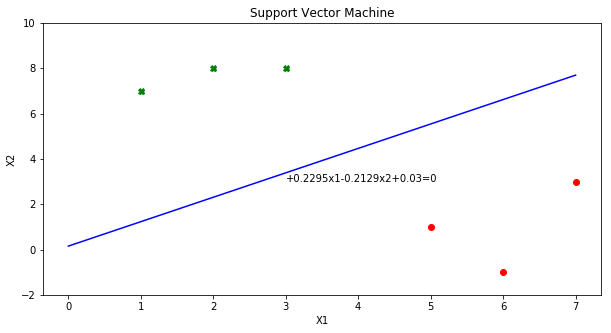

In [5]:
# a scatter plot
fig = plt.figure(figsize = (10, 5))   
ax = fig.add_subplot(1, 1, 1)
for i in range(smsize):
    if y[i] == 1:
        ax.plot(X[i,0], X[i,1], 'o', color='r')
    else:
        ax.plot(X[i,0], X[i,1], 'X', color='g')
# Linear SVM
clf = LinearSVC()
clf.fit(X, y)
wv = np.array(clf.coef_).reshape(2,)
bv = clf.intercept_
ax.text(3, 3, '%+.4fx1%+.4fx2%+4.2f=0' %(wv[0], wv[1], bv))
x2 = np.linspace(0, 7, 15)
y2 = np.dot(x2, -wv[0]/wv[1]) - bv/wv[1]
ax.plot(x2, y2, 'b-')
# configuring the plot
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('Support Vector Machine')
ax.set_ylim(-2, 10)
ax.plot()

## Linear Support Vector Machine - Binary Classification

In [14]:
def score(w, b, X):
    #####################################
    # TODO 1:                           #
    # Compute and return a 1-d array    #
    # of the scores. Use only basic     #
    # Numpy array operations. No loop   #
    # is allowed.                       #
    #####################################
    scresult=np.array([0.00 for i in range (X.shape[0])])
    for j in range (X.shape[0]):
        scresult[j]=w[0]*X[j][0]+w[1]*X[j][1]+0.03
    return scresult
    
    pass

w=[0.2295, -0.2129]
b=0.3
result=score(w,b,X)
print(result)

[-1.2308 -1.2142 -0.9847  0.9646  1.6199  0.9978]


In [50]:
def loss(w, b, s, y, delta):
    z = delta - y * s
    #####################################
    # TODO 2:                           #
    # Compute and return the loss. Use  #
    # only basic Numpy array operations.# 
    # No loop is allowed. Hint: a       #
    # boolean mask can be applied to    #
    # implement the max operator.       #
    #####################################
    print(z)
    posnumbers=5
    posnumbers=z[z>=0.0000]
    print(posnumbers)
    summ=posnumbers.sum()
    ls=summ/z.shape[0]
    return ls

    pass
delta=[2,2,2,2,2,2]
ls=loss(w,b,result,y,delta)
print(ls)


[0.7692 0.7858 1.0153 1.0354 0.3801 1.0022]
[0.7692 0.7858 1.0153 1.0354 0.3801 1.0022]
0.8313333333333334


In [51]:
def gradient(w, b, X, s, y, delta):
    z = delta - y * s
    #####################################
    # TODO 3:                           #
    # Compute the gradient dw and db.   #
    # Use only basic Numpy array        #
    # operations. No loop is allowed.   #
    # Hint: a boolean mask can be       #
    # applied to implement the          #
    # indicator function.               #
    #####################################
    posnumbers= z>0.000
    DW=posnumbers*(y*s)
    dw=DW.sum()
    
    
    DB=posnumbers*y
    print(DB)
    db=DB.sum()
    
    
    pass
    return dw, db
delta=[1,1,1,1,1,1]
dw, db=gradient(w,b,X,result,y,delta)
print(dw,db)

[ 0  0 -1  1  0  1]
2.9471 1


### Problem 3. After reading the SVM algorithm description at the beginning of this notebook, complete TODO 1, TODO 2 and TODO 3 in functions *score*, *loss* and *gradient*. Then run the code below (hint: click the Cell tab, and select Run All). The loss should be decreasing and reach 0 after several iterations. 

In [52]:
para_history = []
loss_history = []
# learning rate
lr = 1.0e-2
# margin
delta = 1.0
# initialization
b = 0.0
w = np.ones(X.shape[1]) * 1.0e-3
for t in range(20):
    # s is a 1-d array of scores
    s = score(w, b, X)
    # L is the loss
    L = loss(w, b, s, y, delta)
    # para_history and loss_history store historical results
    para_history.append((w, b))
    loss_history.append(L)
    # compute gradient
    dw, db = gradient(w, b, X, s, y, delta)
    # gradient descent
    w -= lr * dw
    b -= lr * db
print('Loss = %.4f' %L)
print('Parameters:')
print("b=%.4f" %b)
for j in range(w.shape[0]):
    print("w[%2d]=%.4f" %(j, w[j]))
print("Loss history:")
for i in range(20):
    if (i+1) % 1 == 0:
        print("Iteration %3d: Loss = %.4f" %(i+1, loss_history[i]))

[1.038 1.04  1.041 0.964 0.965 0.96 ]
[1.038 1.04  1.041 0.964 0.965 0.96 ]
[-1 -1 -1  1  1  1]
[1.03864 1.0408  1.04188 0.96352 0.9646  0.9592 ]
[1.03864 1.0408  1.04188 0.96352 0.9646  0.9592 ]
[-1 -1 -1  1  1  1]
[1.0393312 1.041664  1.0428304 0.9630016 0.964168  0.958336 ]
[1.0393312 1.041664  1.0428304 0.9630016 0.964168  0.958336 ]
[-1 -1 -1  1  1  1]
[1.0400777  1.04259712 1.04385683 0.96244173 0.96370144 0.95740288]
[1.0400777  1.04259712 1.04385683 0.96244173 0.96370144 0.95740288]
[-1 -1 -1  1  1  1]
[1.04088391 1.04360489 1.04496538 0.96183707 0.96319756 0.95639511]
[1.04088391 1.04360489 1.04496538 0.96183707 0.96319756 0.95639511]
[-1 -1 -1  1  1  1]
[1.04175462 1.04469328 1.04616261 0.96118403 0.96265336 0.95530672]
[1.04175462 1.04469328 1.04616261 0.96118403 0.96265336 0.95530672]
[-1 -1 -1  1  1  1]
[1.04269499 1.04586874 1.04745562 0.96047875 0.96206563 0.95413126]
[1.04269499 1.04586874 1.04745562 0.96047875 0.96206563 0.95413126]
[-1 -1 -1  1  1  1]
[1.04371059 1.04